dataset from [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection) and stored the data locally. Data is also available on github as the storage size on git allows for it. 

Using this dataset as practice as the images are of different dimensions, similar to another project im working on for a business. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # good for separating RGB properties of an image. 
import glob

In [2]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 77B6-1F68

 Directory of C:\Users\Rudol\0_Github\Brain MRI Data\Brain-MRI-Image-Classifier

27/08/2023  06:09 PM    <DIR>          .
27/08/2023  06:09 PM    <DIR>          ..
24/08/2023  04:37 PM    <DIR>          .ipynb_checkpoints
27/08/2023  06:09 PM         1,569,240 Brain_MRI.ipynb
20/07/2023  09:04 PM    <DIR>          dataset
               1 File(s)      1,569,240 bytes
               4 Dir(s)  954,432,233,472 bytes free


# Reading a single image

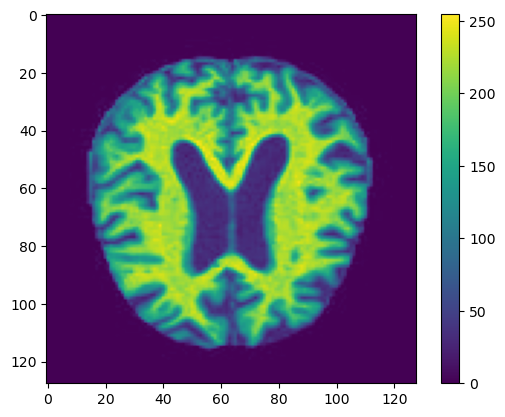

In [4]:
from PIL import Image

image = Image.open('./dataset/Mild_Demented/mild.jpg')
plt.imshow(image)
plt.colorbar()

# Reading multiple images

In [5]:
data_path = './dataset/'
demented_type = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'] #should leard how to extract this with code


for folder in demented_type:
    file_name = glob.glob(data_path + folder + '*.jpg')
    

In [6]:
data_path = './dataset/'

mild = [] 
very_mild = []
healthy = [] 
moderate = []

for i in glob.glob(data_path + 'Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128)) 
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)


for i in glob.glob(data_path + 'Very_Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    very_mild.append(image)

for i in glob.glob(data_path + 'Non_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    healthy.append(image)

for i in glob.glob(data_path + 'Moderate_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    moderate.append(image)


In [7]:
len(very_mild)

2240

In [8]:
mild = np.array(mild)
mild.shape # cannot do this with lists. 

(896, 128, 128, 3)

In [9]:
very_mild = np.array(very_mild)

moderate = np.array(moderate)

healthy = np.array(healthy)

In [10]:
all_types = np.concatenate((mild, very_mild, moderate, healthy))

In [11]:
all_types.shape # all images combined into one dimension. the first dimension is the sum of all the demented types

(6400, 128, 128, 3)

# Visualisation

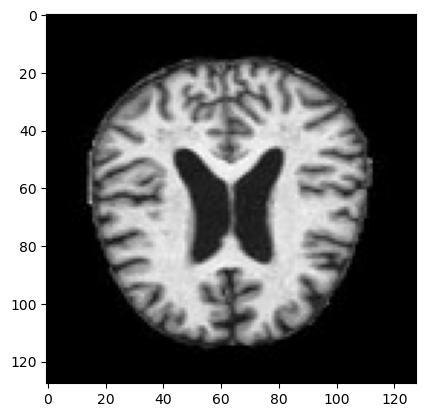

In [12]:
plt.imshow(very_mild[0])

In [13]:
def plot_random(mild, very_mild, moderate, healthy, num= 3):
    mild_images = mild[np.random.choice(mild.shape[0], num, replace = False)]
    very_mild_images = very_mild[np.random.choice(very_mild.shape[0], num, replace = False)]
    moderate_images = moderate[np.random.choice(moderate.shape[0], num, replace = False)]
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    
    plt.figure(figsize = (16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_images[i])
    
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('very_mild')
        plt.imshow(very_mild[i])
        
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('mild')
        plt.imshow(mild_images[i])
        
    plt.figure(figsize= (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('moderate')
        plt.imshow(moderate_images[i])

Above is not very efficient, can reduce the number of 'for loops', however this is just for demonstration purposes. 

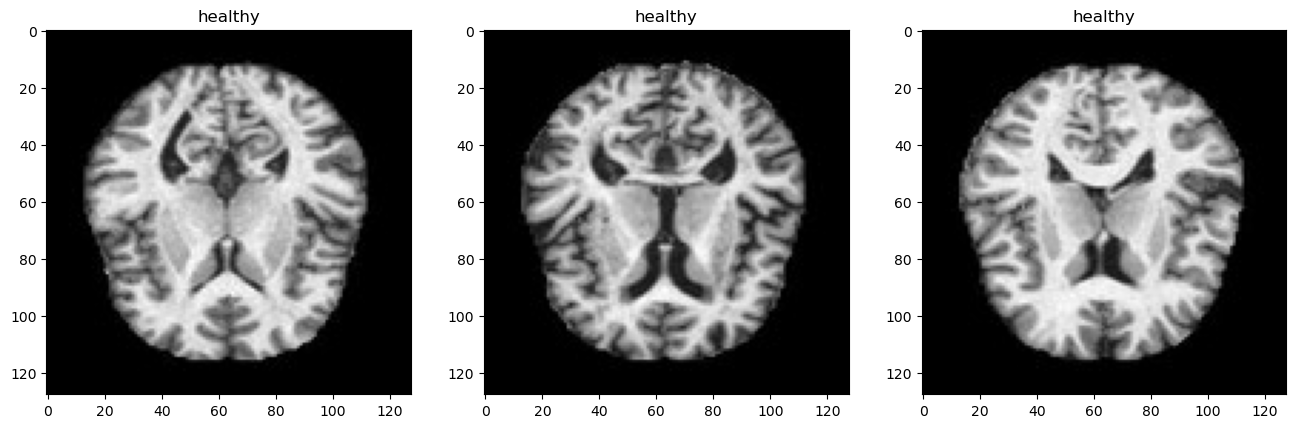

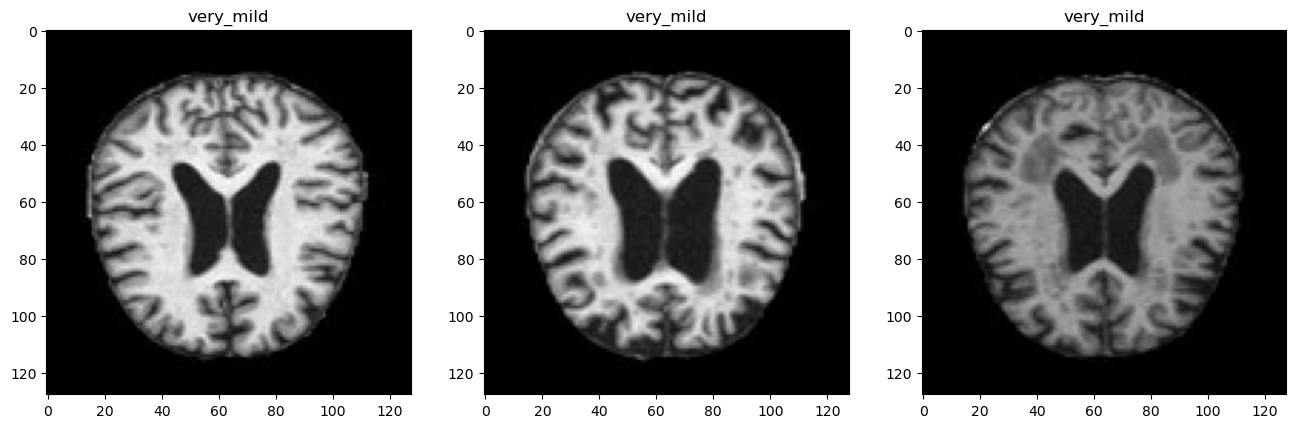

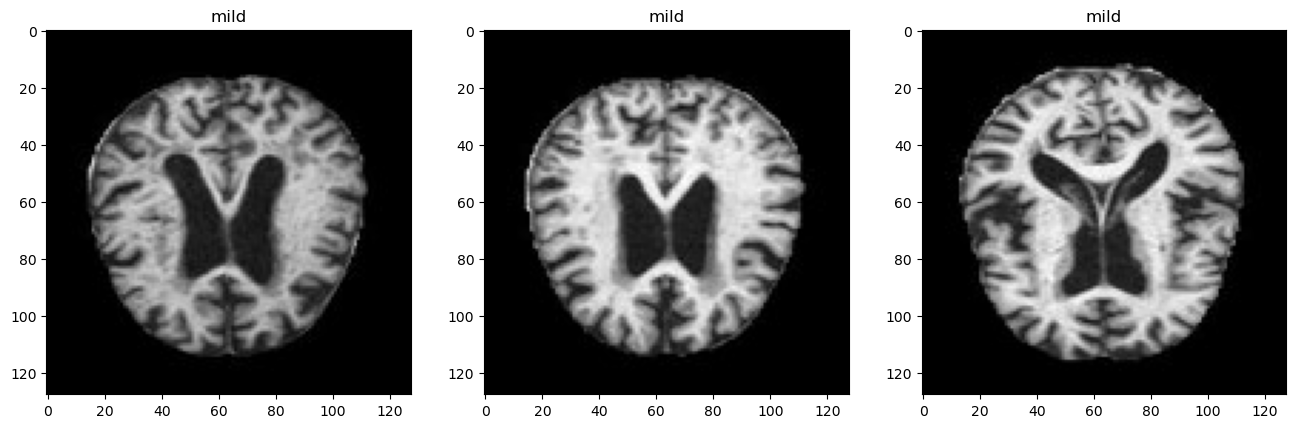

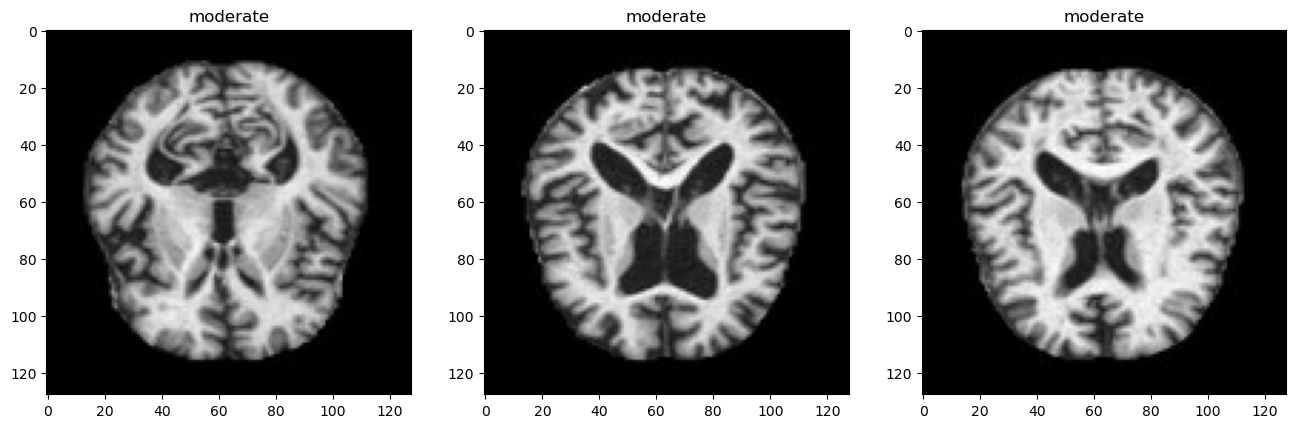

In [14]:
plot_random(mild, very_mild, moderate, healthy)

# Data preparation

## Normalisation

Normalisation is crucial for deep learning. We want to modify the data so that the mean is zero and the standard deviation is one. Therefore ranging between -1 and 1. We do this for including the data in the same range as the activation function for the model. This will allow for less frequent non-zero gradients during training, allowing the neurons in the network to learn faster. Normalising also ensures the channel information can be mixed and updated during the gradient descent (back propagation_ using the same learning rate. 

### Pytorch normalisation

In [15]:
import torch

The images need to be tensors

In [16]:
from torchvision import transforms

C:\Users\Rudol\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Converting from an image to a tensor

In [17]:
mild.shape

(896, 128, 128, 3)

In [18]:
convert_tensor = transforms.ToTensor()
single_mild = convert_tensor(mild[0])

In [19]:
single_mild

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Checking we can still display the image

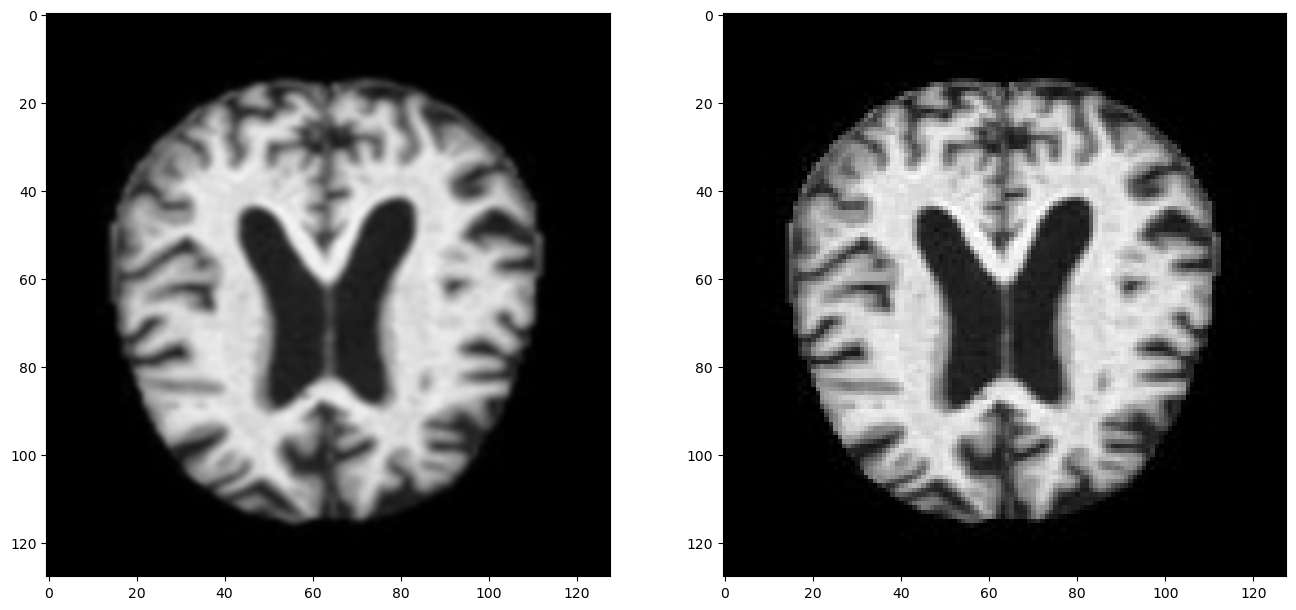

In [20]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.imshow(transforms.ToPILImage()(single_mild), interpolation="bicubic")

plt.subplot(122)
plt.imshow(mild[0])

Notice the image that was transformed twice is a little blurry. 

the stack function requires a tuple of tensors, so we can't feed it a single image.

In [21]:
convert_tensor = transforms.ToTensor()

# Using a lambda function

mild_tensors = [convert_tensor(image) for image in mild]
very_mild_tensors = [convert_tensor(image) for image in very_mild]
moderate_tensors = [convert_tensor(image) for image in moderate]
healthy_tensors = [convert_tensor(image) for image in healthy]

As this provides a list of tensors, we can make it a single tensor, which allows for a more efficient model. The model will be able to distinguish between the separate images even if it's a single tensor. 

In [22]:
mild_tensor = torch.stack(mild_tensors)
very_mild_tensor = torch.stack(very_mild_tensors)
moderate_tensor = torch.stack(moderate_tensors)
healthy_tensor = torch.stack(healthy_tensors)

In [23]:
mild_tensor.shape

torch.Size([896, 3, 128, 128])

Getting the mean for each channel (RGB)

In [24]:
mild_tensor.view(3, -1).mean(dim=1)

tensor([0.2635, 0.2634, 0.2578])

In [25]:
mild_tensor.view(3, -1).std(dim = 1)

tensor([0.3152, 0.3111, 0.3162])

We can now use Pytorch's normalisation function from the transform module

In [26]:
norm =  transforms.Normalize(mild_tensor.view(3, -1).mean(dim=1), mild_tensor.view(3, -1).std(dim = 1))
mild_norm = norm(mild_tensor)

norm =  transforms.Normalize(very_mild_tensor.view(3, -1).mean(dim=1), very_mild_tensor.view(3, -1).std(dim = 1))
very_mild_norm = norm(very_mild_tensor)

norm =  transforms.Normalize(moderate_tensor.view(3, -1).mean(dim=1), moderate_tensor.view(3, -1).std(dim = 1))
moderate_norm = norm(moderate_tensor)

norm =  transforms.Normalize(healthy_tensor.view(3, -1).mean(dim=1), healthy_tensor.view(3, -1).std(dim = 1))
healthy_norm = norm(healthy_tensor)

In [27]:
print(mild_norm.mean(), mild_norm.std())

tensor(-3.9122e-05) tensor(1.0002)


We want 0 and 1 however there may have been rounding errors in the data distribution. We don't want to further round the mean and std as this may introduce precision errors in the future.

## Flattening

Flattening is useful for fully connected networks with dense layers. These networks usually expect 1D input while we currently have 3D. 

Convolutional neural networks can work with 3D tensors directly. CNN is designed to process spatial information in the data. 

Depending on the network used, it will advise whether to flatten. Also important to know the difference between reshaping and flattening. 

Good to experiment with different models to gauge performance with flattenned vs unflattened.

In [28]:
mild_flat = [] 

for i, val in enumerate(mild_norm):
    mild_flat.append(mild_norm[i].flatten())
    
very_mild_flat = [] 

for i, val in enumerate(very_mild_norm):
    very_mild_flat.append(very_mild_norm[i].flatten())
    
moderate_flat = [] 

for i, val in enumerate(moderate_norm):
    moderate_flat.append(moderate_norm[i].flatten())
    
healthy_flat = [] 

for i, val in enumerate(healthy_norm):
    healthy_flat.append(healthy_norm[i].flatten())

In [66]:
type(mild_flat)

list

In [71]:
all_flat = []

all_flat = mild_flat + very_mild_flat + moderate_flat + healthy_flat
all_flat = torch.stack(all_flat)

print(all_flat.shape)

torch.Size([6400, 49152])


## 1D vector of labels

In [72]:
def globFn(demented_type: str):
    #stores the file names in a list
    fitsFileNames = glob.glob(data_path + demented_type +'/*.jpg') # Where the asterisk symbol acts as a wildcard
    return fitsFileNames

In [73]:
#creating the labels
mild_filenames = globFn('Mild_Demented')
very_mild_filenames = globFn('Very_Mild_Demented')
moderate_filenames = globFn('Moderate_Demented')
healthy_filenames = globFn('Non_Demented')

#we want to now binarize these labels so that we can use them in our `trainTestSplitFn`
mild_filenames[0:10]

['./dataset/Mild_Demented\\mild.jpg',
 './dataset/Mild_Demented\\mild_10.jpg',
 './dataset/Mild_Demented\\mild_100.jpg',
 './dataset/Mild_Demented\\mild_101.jpg',
 './dataset/Mild_Demented\\mild_102.jpg',
 './dataset/Mild_Demented\\mild_103.jpg',
 './dataset/Mild_Demented\\mild_104.jpg',
 './dataset/Mild_Demented\\mild_105.jpg',
 './dataset/Mild_Demented\\mild_106.jpg',
 './dataset/Mild_Demented\\mild_107.jpg']

In [31]:
len(mild_filenames)

896

In [32]:
demented_type

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [33]:
demented_type_dict = {demented_type[0]: 'mild', demented_type[1]: 'moderate_mild', 
                      demented_type[2]: 'healthy', demented_type[3]: 'very_mild'}

In [38]:
all_filenames = np.concatenate((mild_filenames, very_mild_filenames, 
                                moderate_filenames, healthy_filenames))
all_filenames.shape

(6400,)

In [39]:
all_filenames

array(['./dataset/Mild_Demented\\mild.jpg',
       './dataset/Mild_Demented\\mild_10.jpg',
       './dataset/Mild_Demented\\mild_100.jpg', ...,
       './dataset/Non_Demented\\non_997.jpg',
       './dataset/Non_Demented\\non_998.jpg',
       './dataset/Non_Demented\\non_999.jpg'], dtype='<U46')

In [40]:
for i in demented_type_dict:
    print(i)

Mild_Demented
Moderate_Demented
Non_Demented
Very_Mild_Demented


In [44]:
mild_labels = []
very_mild_labels = []
moderate_labels = []
healthy_labels = []

labels = []

for i in range(len(all_filenames)):
    if 'Mild_Demented' in all_filenames[i]:
        labels.append(2)

    if 'Very_Mild_Demented' in all_filenames[i]:
        labels.append(1)

    if 'Moderate_Demented' in all_filenames[i]:
        labels.append(3)

    if 'Non_Demented' in all_filenames[i]:
        labels.append(0)

labels= np.array(labels)

labels.shape

(8640,)

Checking that there is 4 labels

In [47]:
np.unique(labels)

array([0, 1, 2, 3])

In [215]:
print(mild_norm.shape)

torch.Size([896, 3, 128, 128])


In [216]:
mild.shape

(896, 128, 128, 3)

In [49]:
from sklearn.model_selection import train_test_split

#splitting the DF with the split function
train_set, test_set, train_labels, test_labels= train_test_split(all_flat, labels, stratify= labels, test_size= 0.3, random_state= 42)

TypeError: Singleton array array(None, dtype=object) cannot be considered a valid collection.

In [223]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

train_labels shape:  (627, 1) and test_labels shape:  (269, 1)


In [224]:
test_labels[0:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

# Convolutional Neural Networks

In [ ]:
model = Sequential() #Sequential is the model, so defining it in a variable so we can use it later.

model.add(Dense(256, input_shape=(32761,), activation="sigmoid"))
#Sigmoid activates the layer.
#first parameter of Dense() is the nodes, we used these numbers in the lectorial. Second parameter is the shape of the image

model.add(Dense(128, activation="sigmoid"))#hidden layer

model.add(Dense(3, activation="softmax"))#first parameter is how many classifications we have. 
#we have three layers, one input layer, one hidden layer and one output layer. 


# ----------------------------------------

learnRate = 0.01 #one of the most important parameters to set in the model. 
#learnRate is for determining how much to change a weight to drive the loss function to a minimum. 
#higher it's set = faster the model runs, but less accurate it is. 

opt = SGD(learnRate,momentum=0.9) #used for optimising the model. 

# ----------------------------------------

model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])#compiling the model

epochs = 100 #number of runs the model does. The more epochs can cause overfit and too little epochs will be underfit. 

#applying the data to the model. 
H = model.fit(trainSet, trainLabels, validation_data=(testSet, testLabels),
              epochs=epochs, batch_size=64, verbose = 0 )


#------------------------------------------
from sklearn.metrics import classification_report #prints a report of the model


#applying the model to all the test data to check how well it's performed. 
predictionsANN = model.predict(testSet)

# Print a formatted report
print(classification_report(testLabels.argmax(axis=1), 
                                                  
                            predictionsANN.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))#sets the labels for each output
                                                                        

